In [20]:
import pyforest 

import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_excel('Contraceptive_method_dataset.xlsx')

df.head()

<IPython.core.display.Javascript object>

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [22]:
df.shape

(1473, 10)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


* Type of data features
    - Float - 2
    - Int - 1
    - Object - 7
* Few null values in features,
    - Wife_age (71)
    - No_of_children_born (21)

In [24]:
df.isna().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [25]:
df[df.duplicated()]

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
79,38.0,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No
167,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
224,47.0,Tertiary,Tertiary,4.0,Scientology,No,1,Very High,Exposed,No
270,30.0,Tertiary,Tertiary,2.0,Scientology,No,1,Very High,Exposed,No
299,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1367,44.0,Tertiary,Tertiary,5.0,Scientology,Yes,1,Very High,Exposed,Yes
1387,NaN,Secondary,Tertiary,2.0,Scientology,Yes,2,Very High,Exposed,Yes
1423,NaN,Tertiary,Tertiary,2.0,Non-Scientology,No,1,Very High,Exposed,Yes
1440,NaN,Tertiary,Tertiary,1.0,Non-Scientology,Yes,2,Very High,Exposed,Yes


In [26]:
80/len(df)

0.05431093007467753

* There are 80 duplicate entries in the dataset. Which is around 5% of the data from the dataset.
* We'll be dropping these 80 entries as duplicate data brings more redundancy to the model and it becomes more baised in learning stage and makes bad predictions.

In [27]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1326 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1372 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 109.0+ KB


In [28]:
df.isna().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

* Updated dataframe has 1393 data points.
* Null values are still available in columns - 
    - Wife_age (67)
    - No_of_children_born (21)

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1326.0,32.557315,8.289259,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1372.0,3.290816,2.399697,0.0,1.0,3.0,5.0,16.0
Husband_Occupation,1393.0,2.174444,0.854590,1.0,1.0,2.0,3.0,4.0


In [30]:
df.describe(include='object').T

,count,unique,top,freq
Wife_ education,1393,4,Tertiary,515
Husband_education,1393,4,Tertiary,827
Wife_religion,1393,2,Scientology,1186
Wife_Working,1393,2,No,1043
Standard_of_living_index,1393,4,Very High,618
Media_exposure,1393,2,Exposed,1284
Contraceptive_method_used,1393,2,Yes,779


* Only Wife_age column seems to be perfect continuous numerical column, where the Mean and Medain almost coincides with eachother. WE can expect a normal distribution curve here.
* Num_of_children_born and Husband_occupation are ordinal variables and they should be analysed under categorical plots for better insights.
* From wife_education and Husband_eduction values, we can interpret that most of the women are educated (Tertiary) as well as Most of the Males/Husbands are also educated.
* The other contrast feature is Wife_working, it has around 1043 women not working where we have seen around 500 women are educated well but there are lot women who are not working.
* Around 90% of women are exposed to media from our data.
* Importantly, ~50% women used Contraceptive method. Which means we have good equally biased data.

In [31]:
df.nunique()

Wife_age                     34
Wife_ education               4
Husband_education             4
No_of_children_born          15
Wife_religion                 2
Wife_Working                  2
Husband_Occupation            4
Standard_of_living_index      4
Media_exposure                2
Contraceptive_method_used     2
dtype: int64

In [32]:
num_cols = df.select_dtypes(exclude='object').columns.to_list()
cat_cols = [col for col in df.columns if col not in num_cols]
num_cols,cat_cols

(['Wife_age', 'No_of_children_born', 'Husband_Occupation'],
 ['Wife_ education',
  'Husband_education',
  'Wife_religion',
  'Wife_Working',
  'Standard_of_living_index',
  'Media_exposure ',
  'Contraceptive_method_used'])

In [33]:
cat_cols1 = cat_cols.copy()
cat_cols1.extend(num_cols[1:])
cat_cols1

['Wife_ education',
 'Husband_education',
 'Wife_religion',
 'Wife_Working',
 'Standard_of_living_index',
 'Media_exposure ',
 'Contraceptive_method_used',
 'No_of_children_born',
 'Husband_Occupation']

# Data Visualisation

In [34]:
from vizad.univariate import plot_univariate_categorical, plot_univariate_numeric
from vizad.bivariate import plot_bivariate_categorical, plot_bivariate_numeric

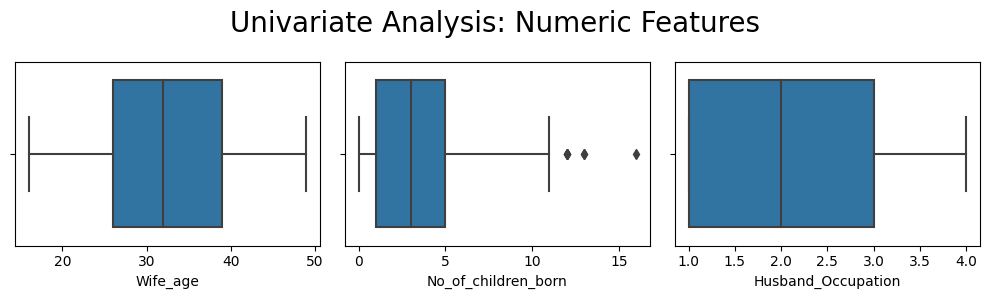

In [35]:
plot_univariate_numeric(df, num_cols)

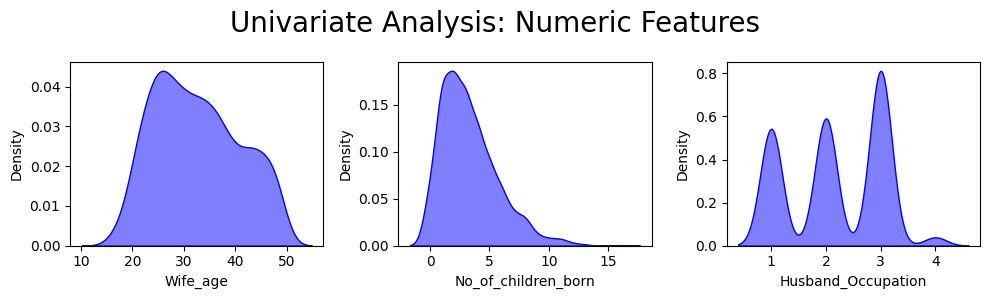

In [36]:
plot_univariate_numeric(df, num_cols, kind='density')

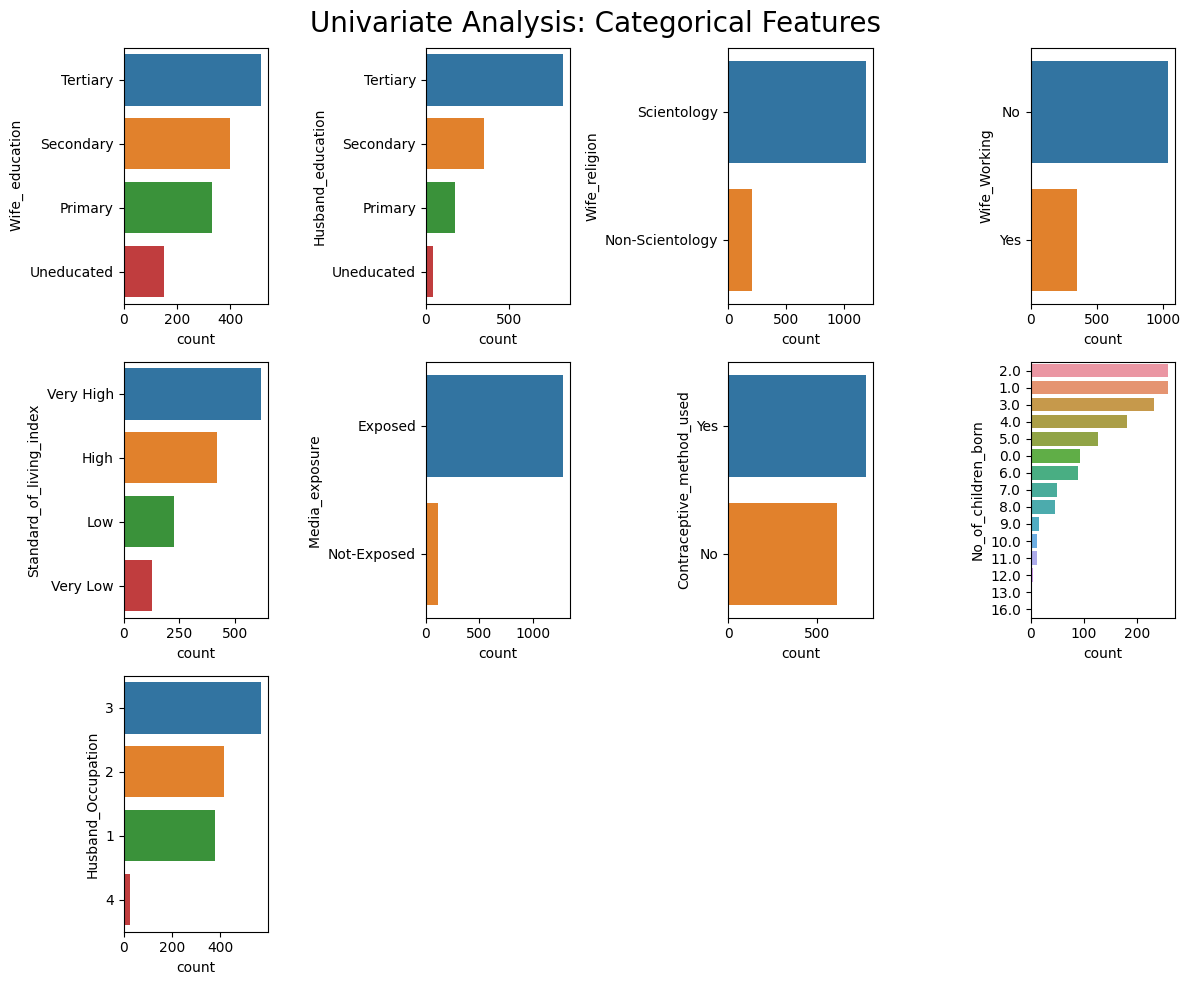

In [37]:
plot_univariate_categorical(df, cat_cols1, subplot_cols=4)

In [38]:
# plot_univariate_categorical(df, cat_cols1, subplot_cols=4, kind='proportion')

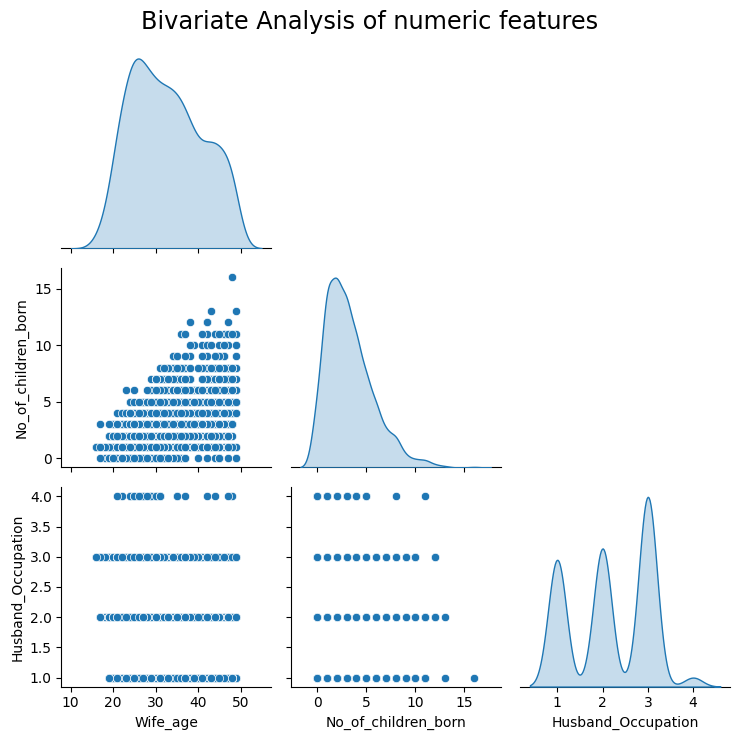

In [39]:
plot_bivariate_numeric(df, num_cols)

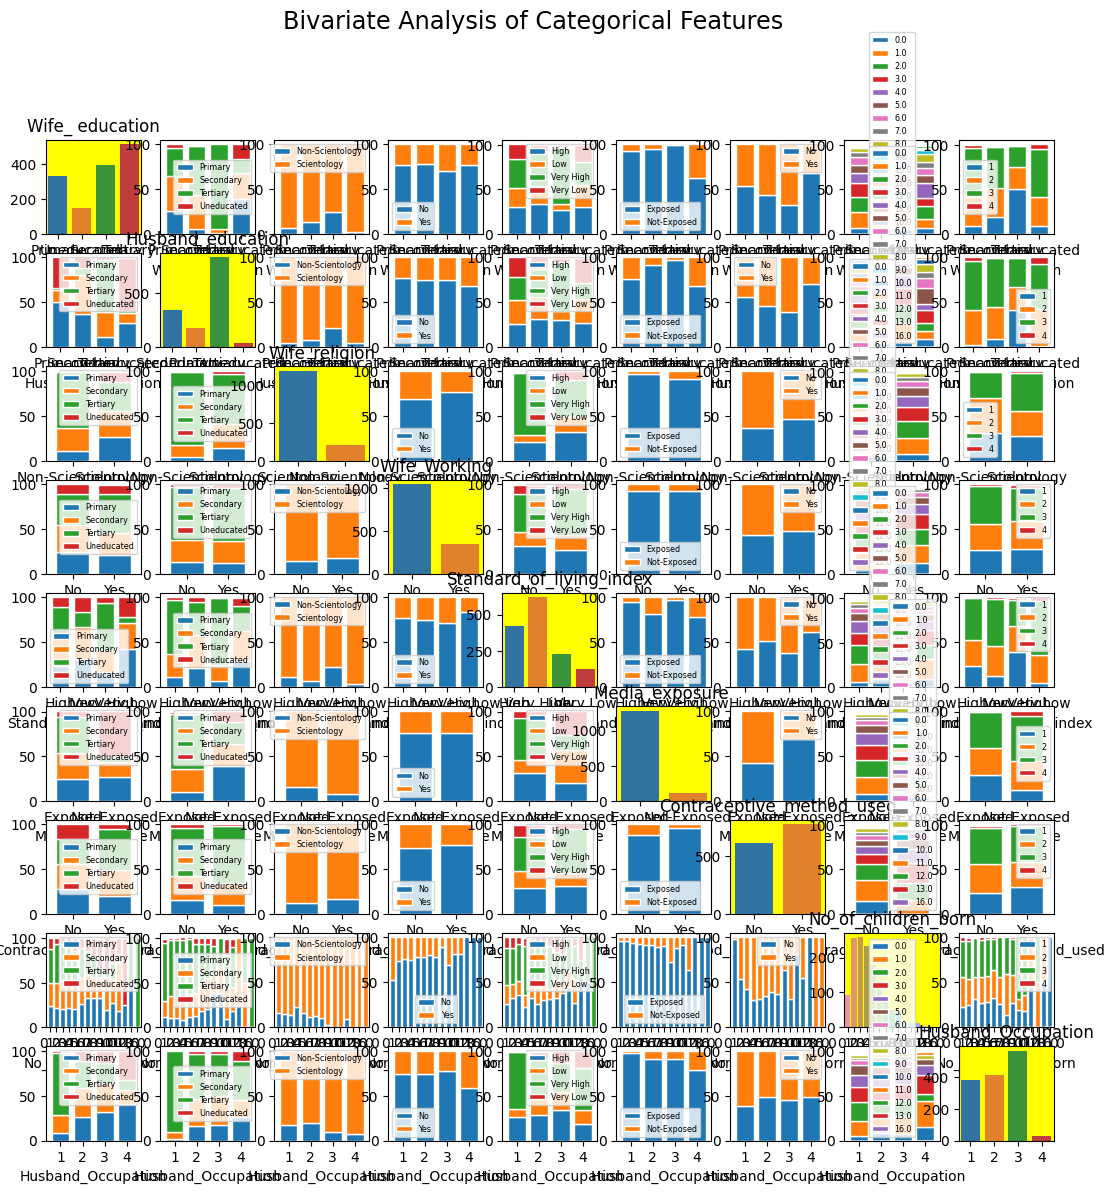

In [40]:
plot_bivariate_categorical(df,cat_cols1, figsize=(13,13))

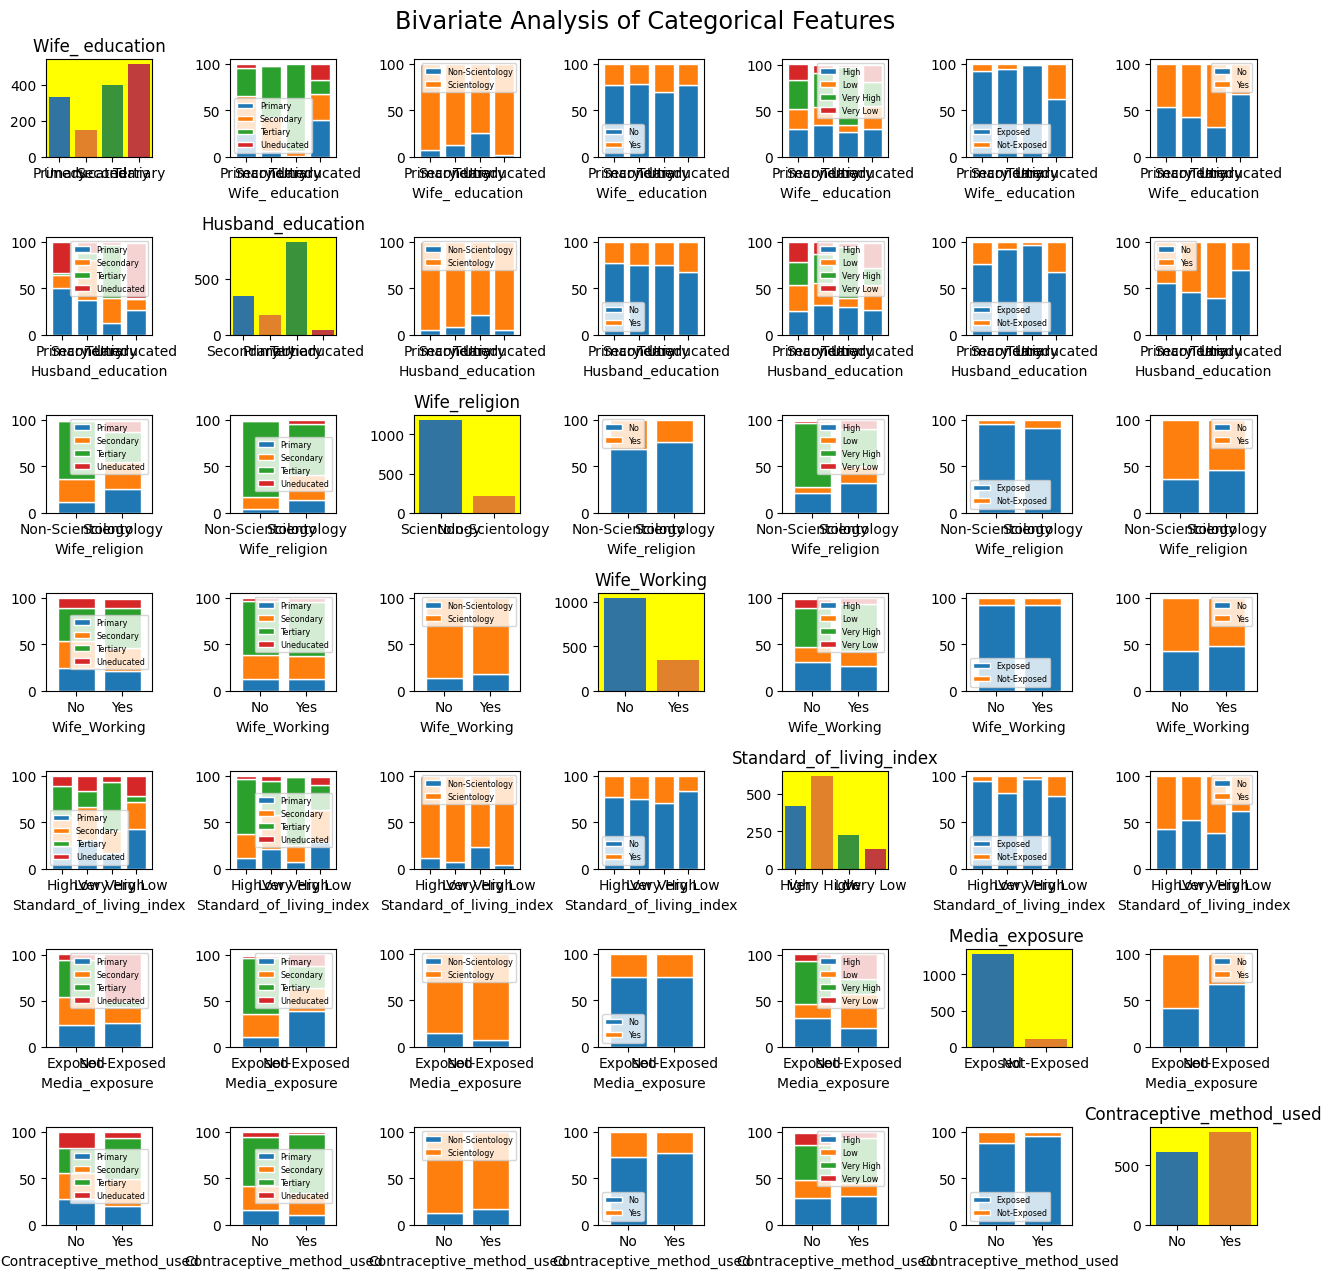

In [41]:
plot_bivariate_categorical(df,cat_cols, figsize=(13,13))

* From the above plots, if we focus on last column where contraceptive method along with all categorical variables for insights.
* Wife_education and Husband_education solely played a significant role in choosing the contraceptive method to use or not. 
* Most of the educated women and men which falls under Tertiary and Secondary has opted for contraceptive methods.
* But the uneducated women and men due to lack of knowledge and awareness didn't use contraceptive method.
* Assumed wife_working might also play a role but there's not significant difference within working women.

<IPython.core.display.Javascript object>

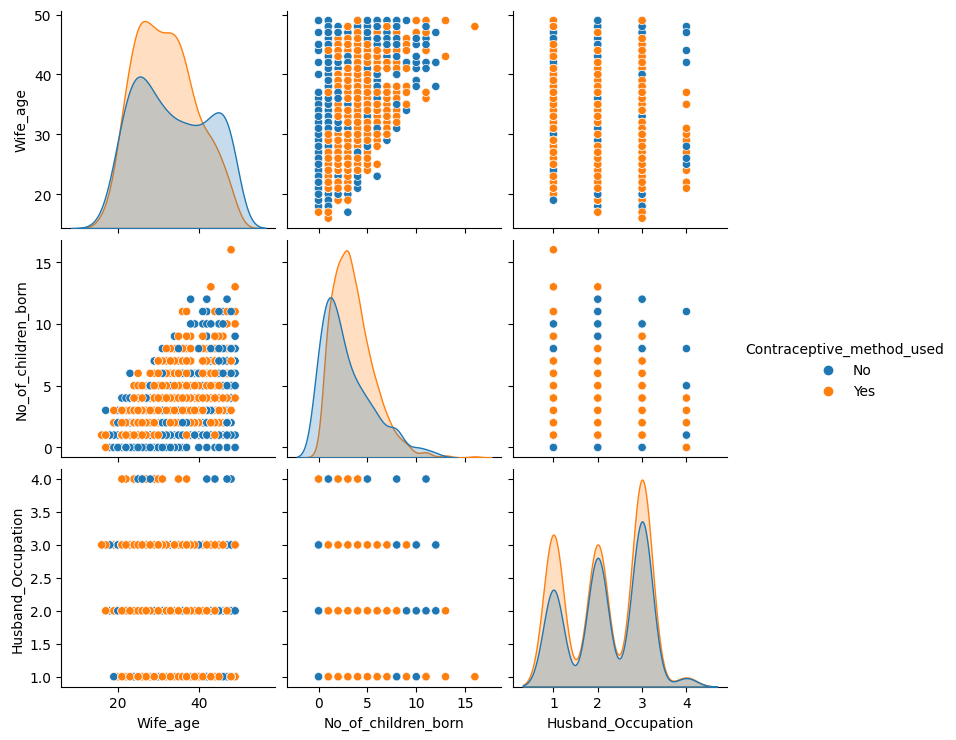

In [42]:
sns.pairplot(data=df, hue='Contraceptive_method_used');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

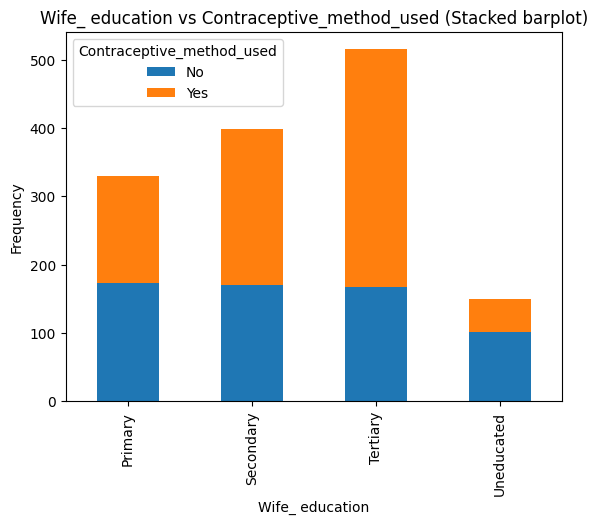

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

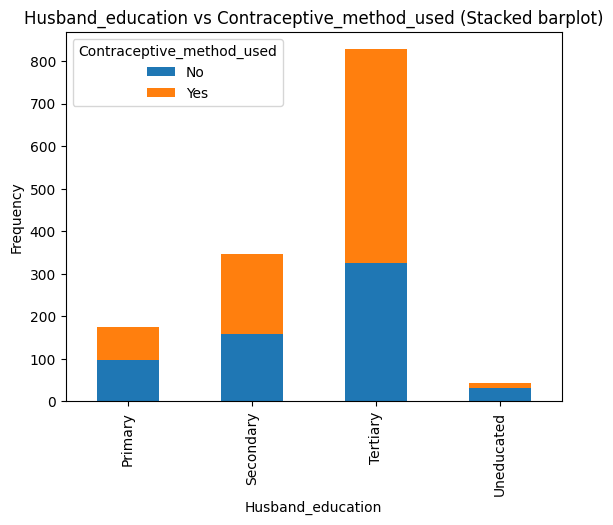

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

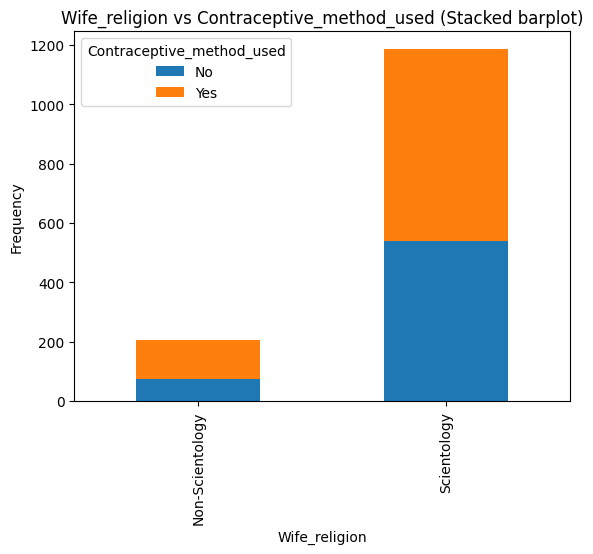

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

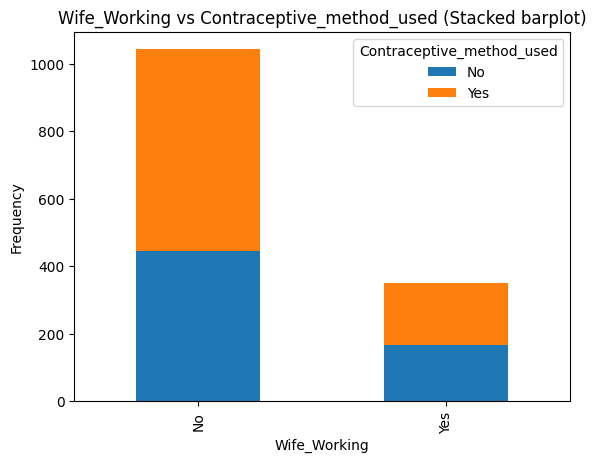

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

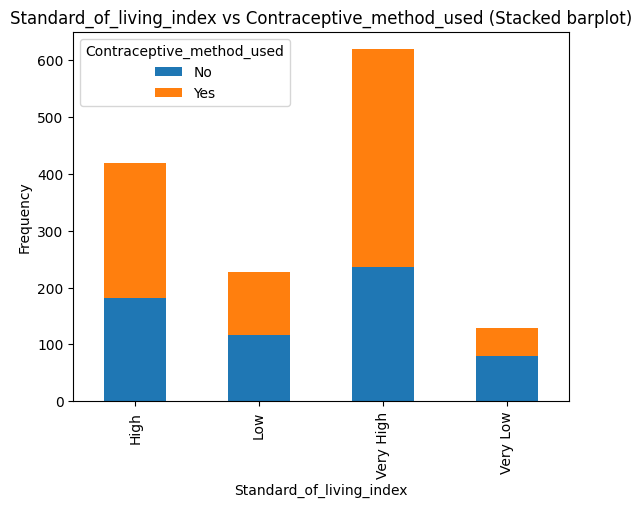

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

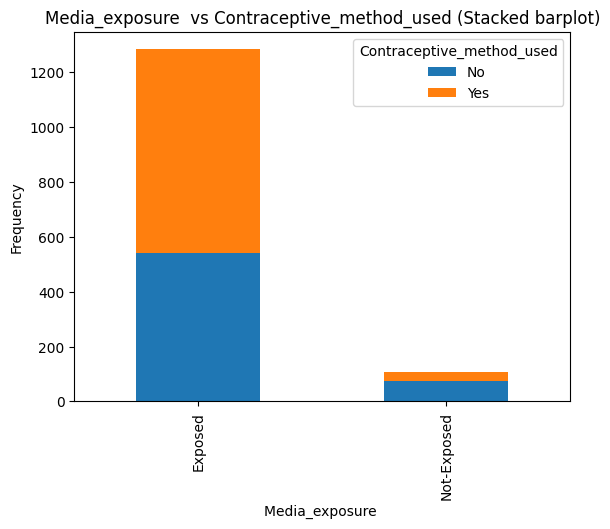

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

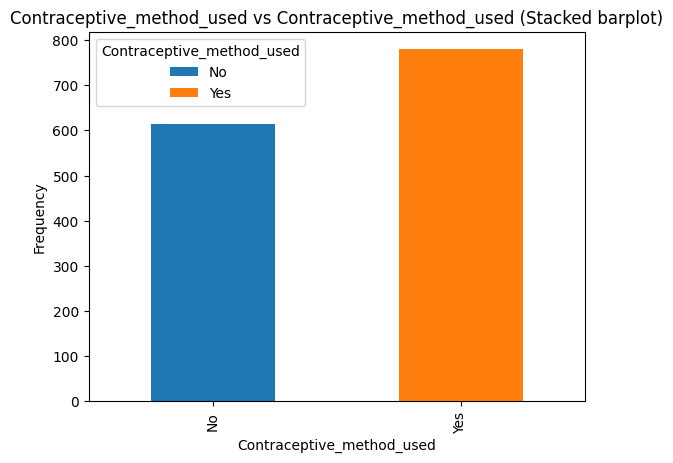

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

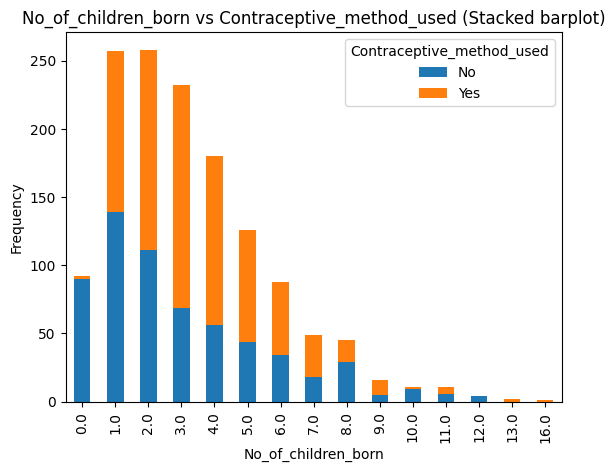

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

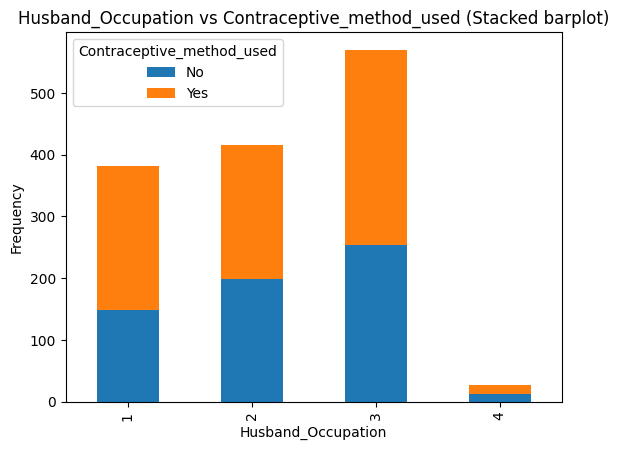

In [43]:
for i in cat_cols1:
    df.groupby([i,'Contraceptive_method_used']).size().unstack().plot.bar(stacked=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'{i} vs Contraceptive_method_used (Stacked barplot)')
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

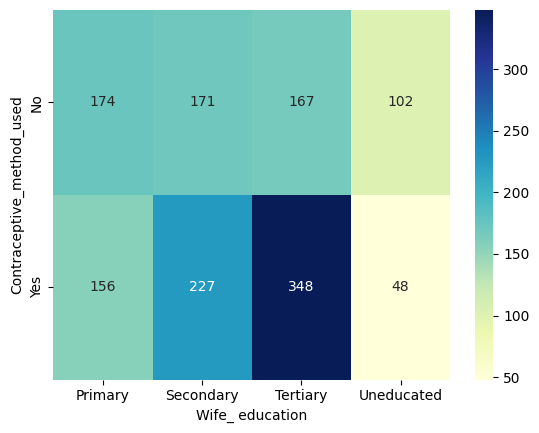

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

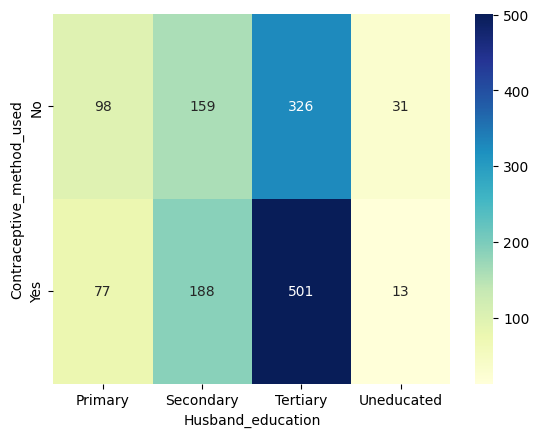

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

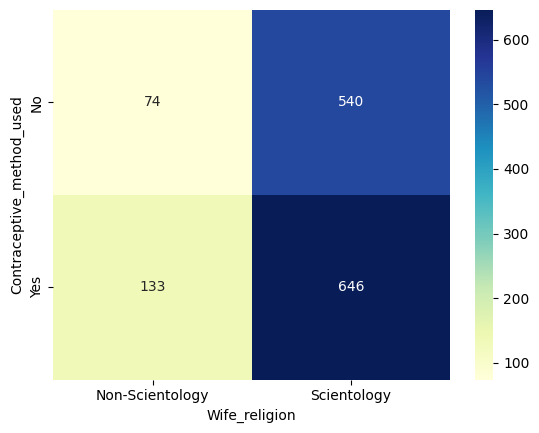

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

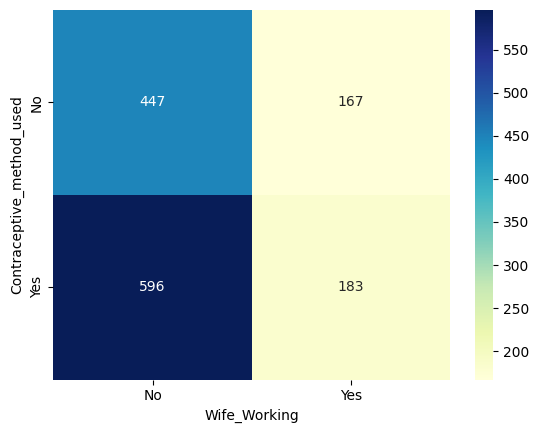

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

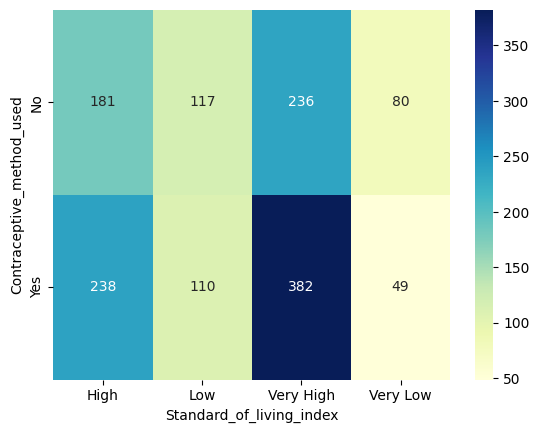

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

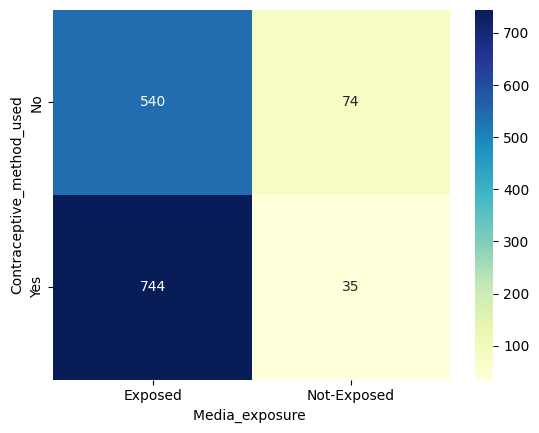

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

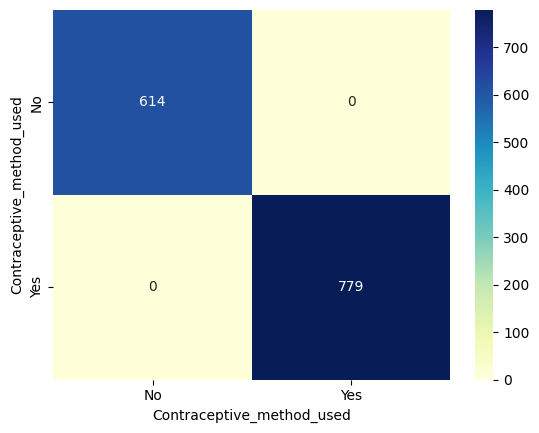

In [44]:
for i in cat_cols:
    sns.heatmap(pd.crosstab(df.Contraceptive_method_used, df[i]), annot=True, fmt='.0f', cmap='YlGnBu')
    plt.show()

# Preprocessing

In [45]:
df_copy = df.copy()

df_copy.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


* Label encoding can be performed for Wife_education, Husband_education, and Standard_of_living_index features because they do have order within the feature space.
* By default, we can Label Encoder from sklearn but it gives ranking based on Alphabetical order but not via in-value meaning behind the data. Hence, we can do encoding explicitly via replace function.

In [46]:
df_copy.rename(columns={'Wife_ education':'Wife_education'}, inplace=True)
df_copy.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [47]:
df_copy.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [48]:
df_copy.rename(columns={'Media_exposure ':'Media_exposure'}, inplace=True)
df_copy.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

In [49]:
df_copy.Wife_education.value_counts()

Wife_education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: count, dtype: int64

* Considering levels as
    - Uneducated as 0
    - Primary as 1
    - Secondary as 2
    - Tertiary as 3

In [50]:
df_copy.Wife_education.replace({'Uneducated':1,'Primary':2,'Secondary':3,'Tertiary':4}, inplace=True)

df_copy.Wife_education.value_counts()

Wife_education
4    515
3    398
2    330
1    150
Name: count, dtype: int64

In [51]:
df_copy.Husband_education.value_counts()

Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: count, dtype: int64

In [52]:
# Same above approach will be used for Husband_education

df_copy.Husband_education.replace({'Uneducated':1,'Primary':2,'Secondary':3,'Tertiary':4}, inplace=True)

df_copy.Husband_education.value_counts()

Husband_education
4    827
3    347
2    175
1     44
Name: count, dtype: int64

In [53]:
df_copy.Wife_religion.replace({'Scientology':1, 'Non-Scientology':0}, inplace=True)
df_copy.Wife_Working.replace({'Yes':1, 'No':0}, inplace=True)
df_copy.Media_exposure.replace({'Exposed':1, 'Not-Exposed':0}, inplace=True)


In [54]:
df_copy.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,1,0,2,High,1,No
1,45.0,1,3,10.0,1,0,3,Very High,1,No
2,43.0,2,3,7.0,1,0,3,Very High,1,No
3,42.0,3,2,9.0,1,0,3,High,1,No
4,36.0,3,3,8.0,1,0,3,Low,1,No


In [55]:
# case-1 - encode standard_of_living_index with 4 ordered values 

df_copy.Standard_of_living_index.replace({'Very Low':1, 'Low':2,'High':3,'Very High':4}, inplace=True)
df_copy.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,1,0,2,3,1,No
1,45.0,1,3,10.0,1,0,3,4,1,No
2,43.0,2,3,7.0,1,0,3,4,1,No
3,42.0,3,2,9.0,1,0,3,3,1,No
4,36.0,3,3,8.0,1,0,3,2,1,No


In [56]:
# case-2 - Encode 'Very Low' and 'Low' to 0, 'Very High' and 'High' as 1

<IPython.core.display.Javascript object>

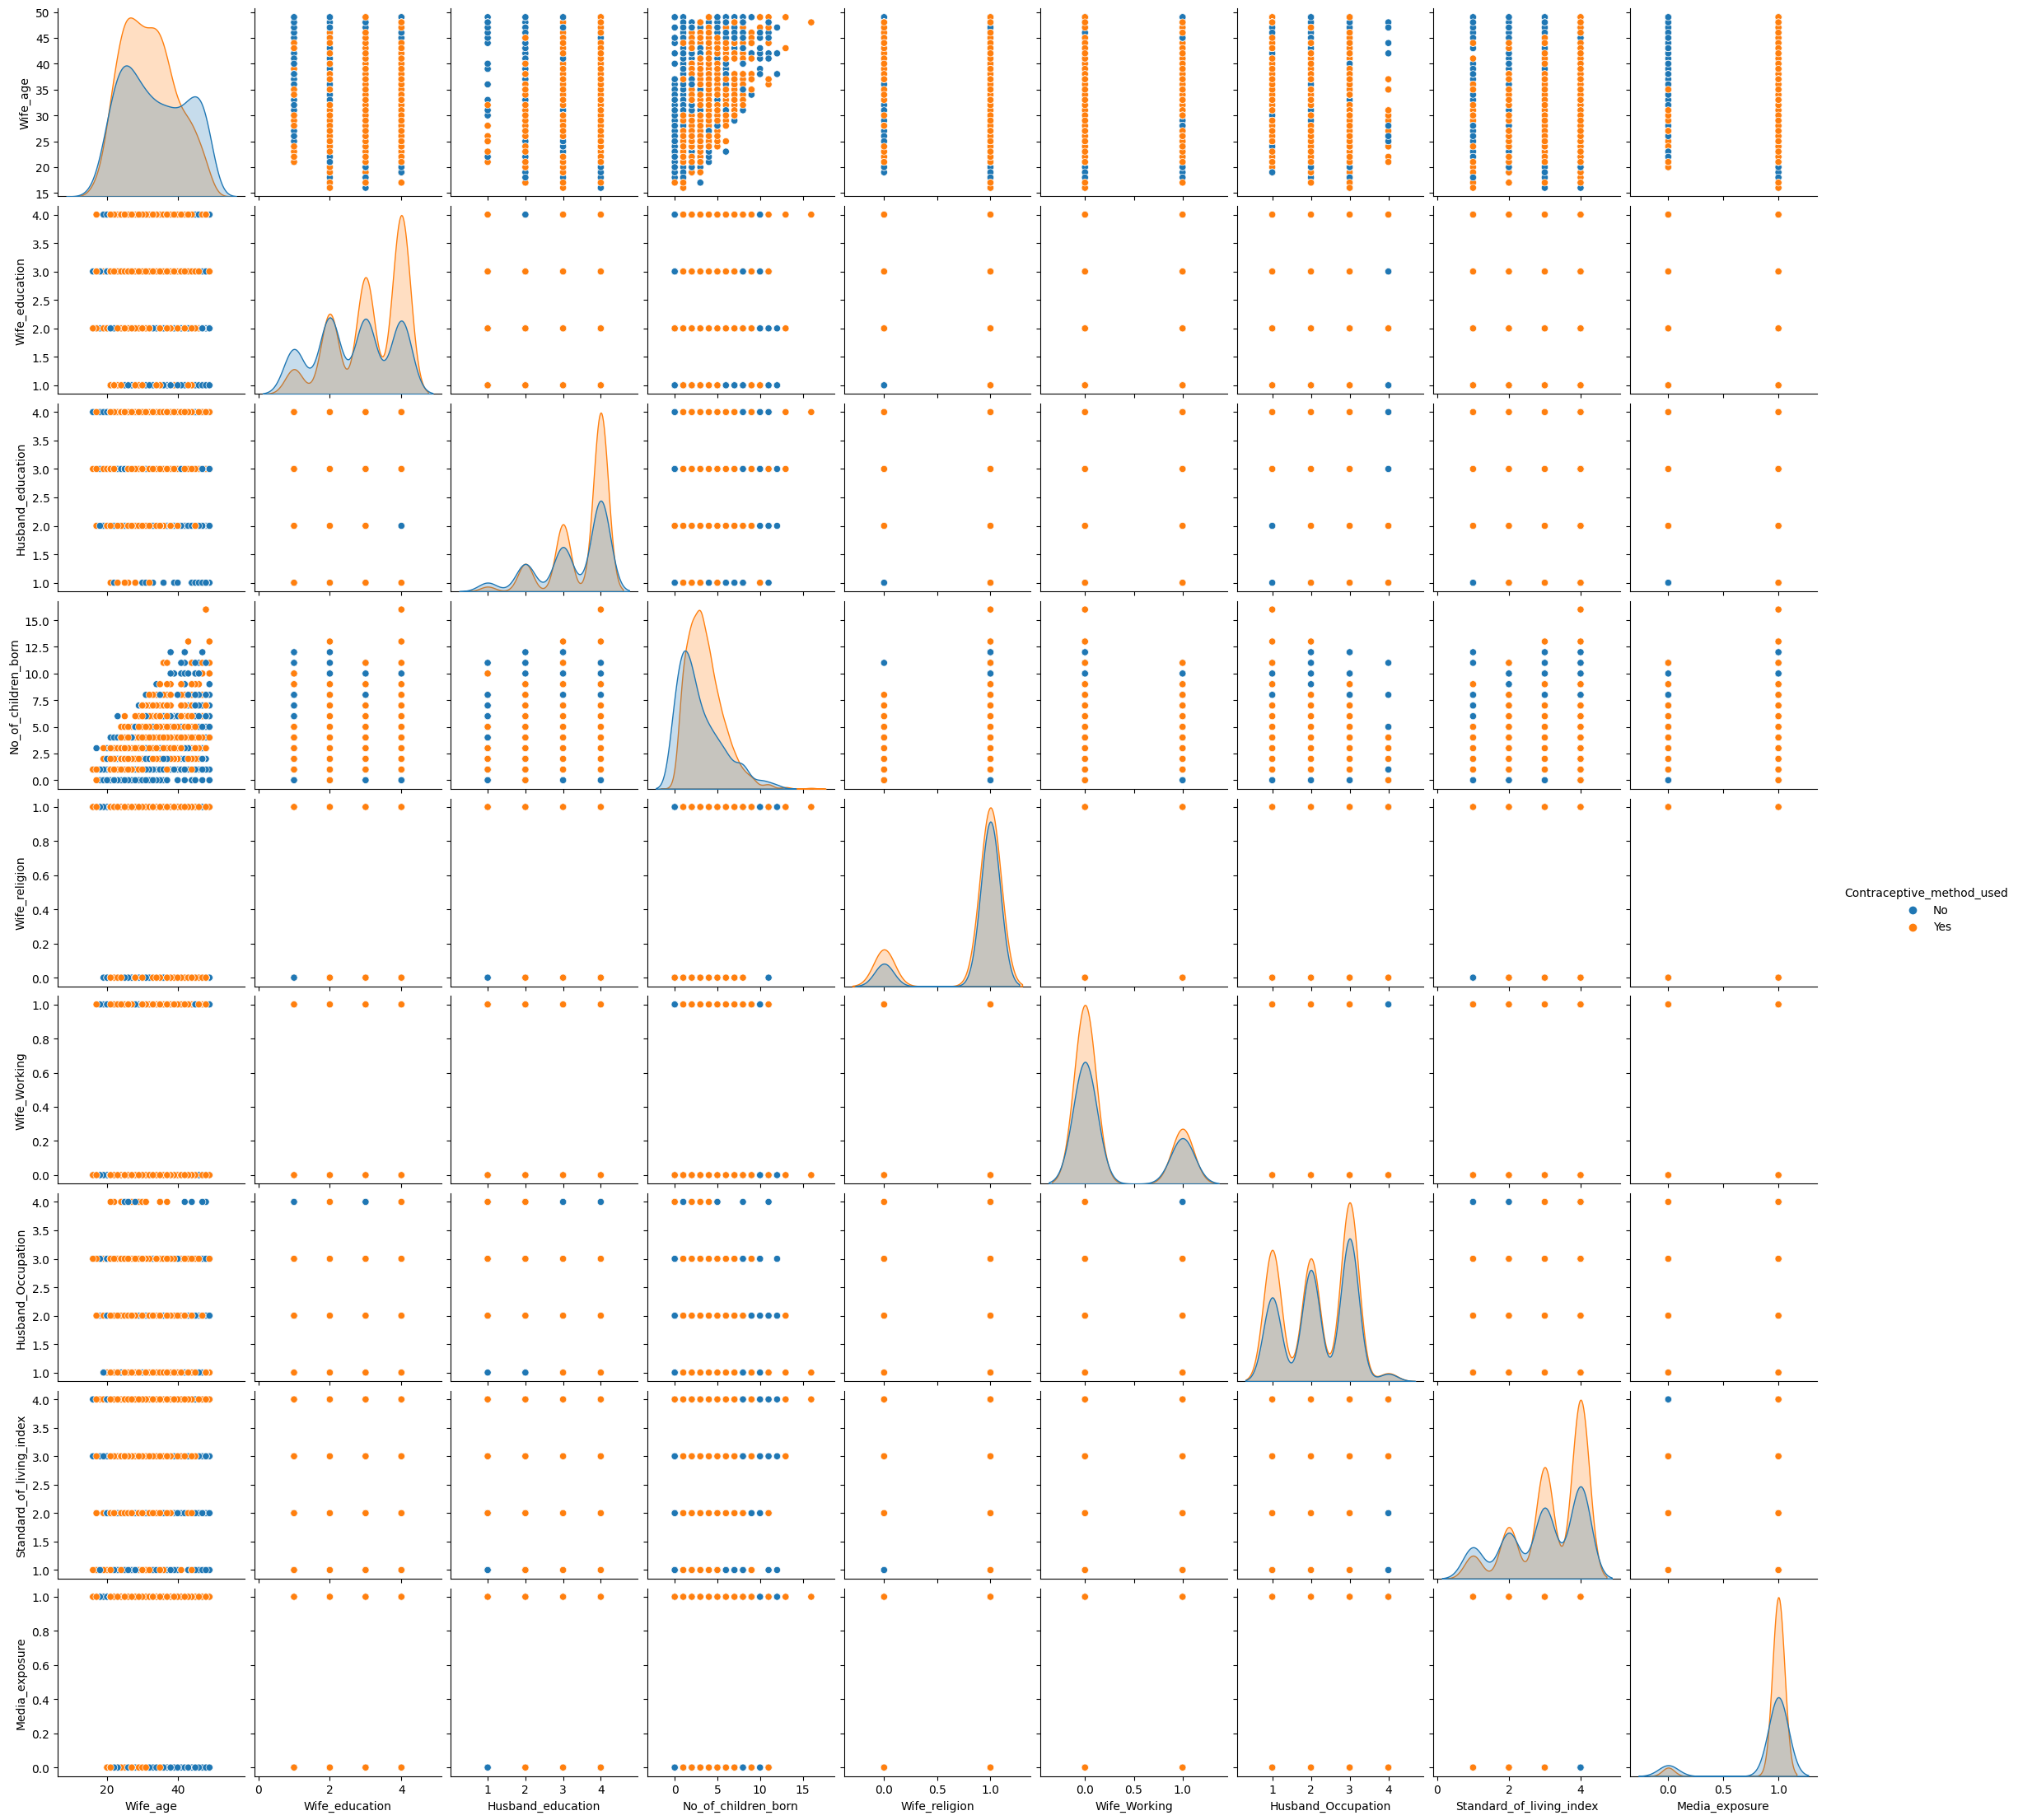

In [57]:
sns.pairplot(data=df_copy, hue='Contraceptive_method_used');

* Focusing on diagonal for classication interpretation by Target Variable
    - Wife_age, Wife_education, Husband_education, Standard_of_living_index, Media_exposure features are able to differentiate both classes in target variable to an extent.
    - Remaining variables No_of_children_born, Wife_religion, Wife_working, Husband_occupation columns are not much explanatory about target data.

In [58]:
df_copy.isna().sum()

Wife_age                     67
Wife_education                0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [59]:
df_copy.Wife_age.fillna(df_copy.Wife_age.mean(), inplace=True)
df_copy.No_of_children_born.fillna(df_copy.No_of_children_born.mode()[0], inplace=True)

df_copy.isna().sum()

Wife_age                     0
Wife_education               0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [60]:
df_copy.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,1,0,2,3,1,No
1,45.0,1,3,10.0,1,0,3,4,1,No
2,43.0,2,3,7.0,1,0,3,4,1,No
3,42.0,3,2,9.0,1,0,3,3,1,No
4,36.0,3,3,8.0,1,0,3,2,1,No


In [61]:
df_copy.Contraceptive_method_used.value_counts()

Contraceptive_method_used
Yes    779
No     614
Name: count, dtype: int64

# Modelling

In [62]:
x = df_copy.drop('Contraceptive_method_used', axis=1)
y = df_copy.Contraceptive_method_used

In [63]:
# Split the data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=27)

<IPython.core.display.Javascript object>

In [64]:
from sklearn.metrics import *
target_cls = {0:'No',1:'Yes'}

### Logistic Regression

Training Accuracy score -  0.6861538461538461 


              precision    recall  f1-score   support

          No       0.68      0.49      0.57       417
         Yes       0.69      0.83      0.75       558

    accuracy                           0.69       975
   macro avg       0.69      0.66      0.66       975
weighted avg       0.69      0.69      0.68       975



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

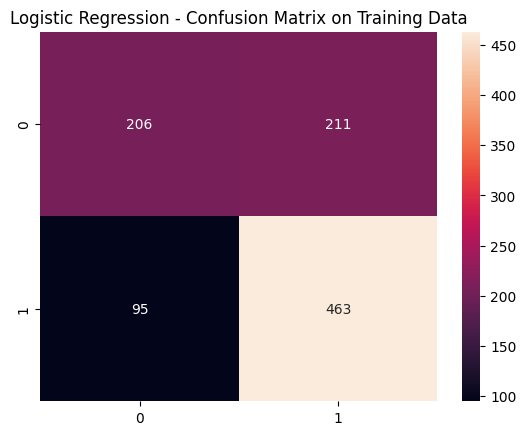

In [65]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=27).fit(x_train,y_train)
train_pred_lr = lr.predict(x_train)
print('Training Accuracy score - ',accuracy_score(y_train, train_pred_lr),'\n\n')
print(classification_report(y_train, train_pred_lr))
sns.heatmap(confusion_matrix(y_train, train_pred_lr), annot=True, fmt='.0f')
plt.title('Logistic Regression - Confusion Matrix on Training Data');

In [66]:
# cm = confusion_matrix(y_train, train_pred_lr, labels=lr.classes_)
# ConfusionMatrixDisplay(cm,display_labels=lr.classes_)
# plt.show();

Testing Accuracy score -  0.6339712918660287 


              precision    recall  f1-score   support

          No       0.67      0.44      0.53       197
         Yes       0.62      0.81      0.70       221

    accuracy                           0.63       418
   macro avg       0.64      0.62      0.61       418
weighted avg       0.64      0.63      0.62       418



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

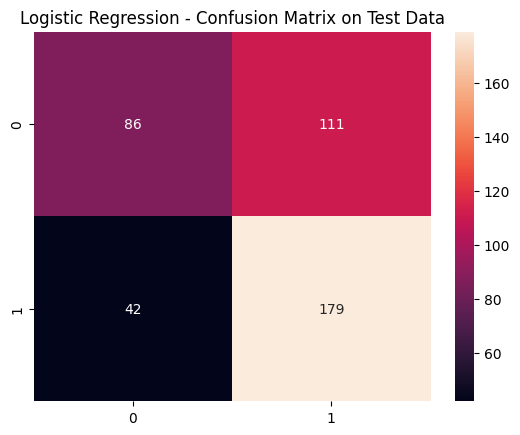

In [67]:
test_pred_lr = lr.predict(x_test)
print('Testing Accuracy score - ',accuracy_score(y_test, test_pred_lr),'\n\n')
print(classification_report(y_test, test_pred_lr))
sns.heatmap(confusion_matrix(y_test, test_pred_lr), annot=True, fmt='.0f')
plt.title('Logistic Regression - Confusion Matrix on Test Data');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

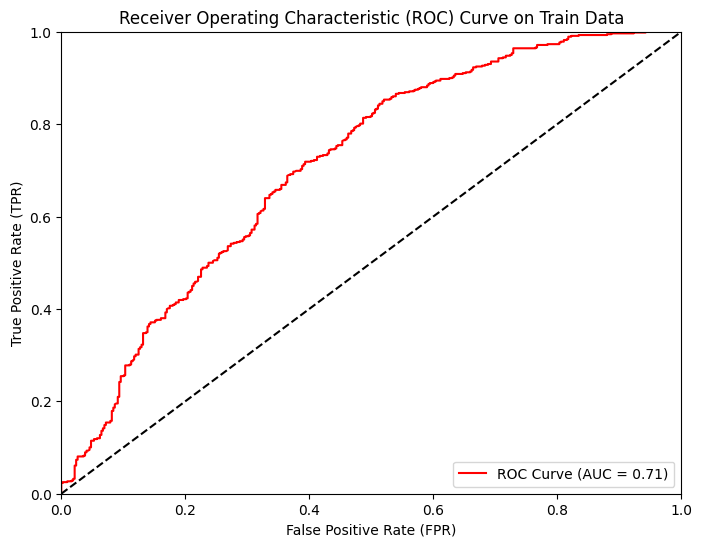

In [68]:
train_pred_prob_lr = lr.predict_proba(x_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, train_pred_prob_lr, pos_label='Yes')

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score, color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve on Train Data')
plt.legend(loc='lower right')
plt.show()

In [69]:
print('LR coeffs interpretation')
print('*'*30)

print('intercept -> ', lr.intercept_[0].round(2))
for i,j in zip(x_train.columns, lr.coef_[0]):
    print(i,' -> ',j.round(2))

LR coeffs interpretation
******************************
intercept ->  -1.14
Wife_age  ->  -0.07
Wife_education  ->  0.47
Husband_education  ->  0.04
No_of_children_born  ->  0.33
Wife_religion  ->  -0.18
Wife_Working  ->  -0.21
Husband_Occupation  ->  0.09
Standard_of_living_index  ->  0.26
Media_exposure  ->  0.58


In [70]:
# pd.DataFrame()

### LDA

Training Accuracy score -  0.6902564102564103 


              precision    recall  f1-score   support

          No       0.70      0.49      0.57       417
         Yes       0.69      0.84      0.76       558

    accuracy                           0.69       975
   macro avg       0.69      0.66      0.67       975
weighted avg       0.69      0.69      0.68       975



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

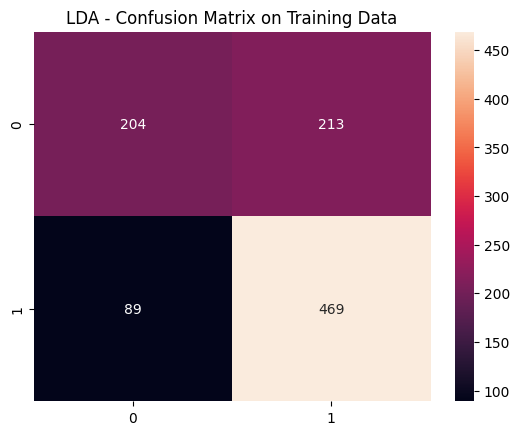

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(x_train,y_train)
train_pred_lda = lda.predict(x_train)
print('Training Accuracy score - ',accuracy_score(y_train, train_pred_lda),'\n\n')
print(classification_report(y_train, train_pred_lda))
sns.heatmap(confusion_matrix(y_train, train_pred_lda), annot=True, fmt='.0f')
plt.title('LDA - Confusion Matrix on Training Data');

Test Accuracy score -  0.6339712918660287 


              precision    recall  f1-score   support

          No       0.68      0.42      0.52       197
         Yes       0.61      0.82      0.70       221

    accuracy                           0.63       418
   macro avg       0.65      0.62      0.61       418
weighted avg       0.65      0.63      0.62       418



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

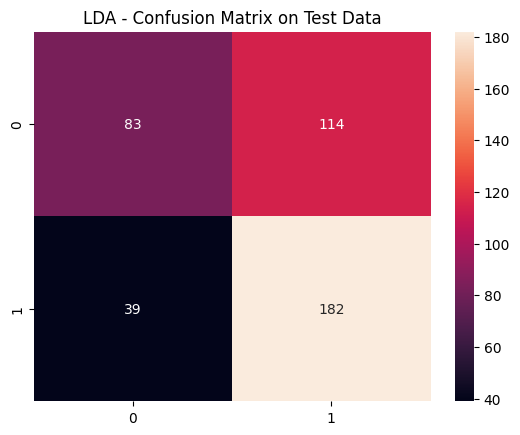

In [72]:
test_pred_lda = lda.predict(x_test)
print('Test Accuracy score - ',accuracy_score(y_test, test_pred_lda),'\n\n')
print(classification_report(y_test, test_pred_lda))
sns.heatmap(confusion_matrix(y_test, test_pred_lda), annot=True, fmt='.0f')
plt.title('LDA - Confusion Matrix on Test Data');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

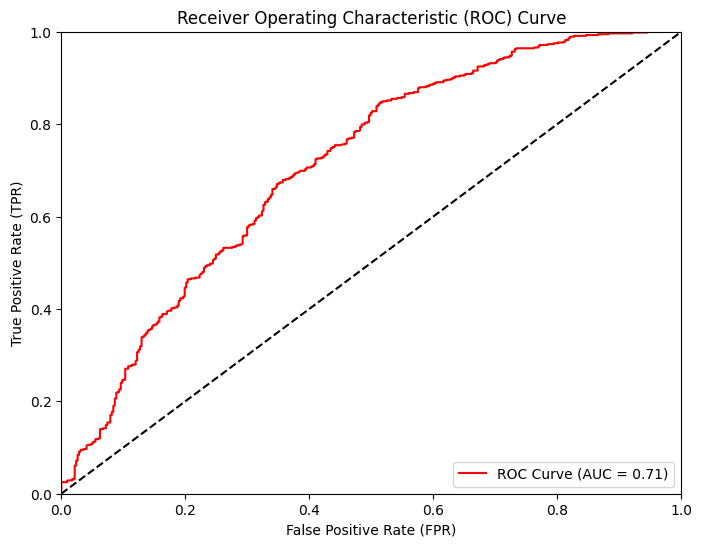

In [73]:
train_pred_prob_lda = lda.predict_proba(x_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, train_pred_prob_lda, pos_label='Yes')

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score, color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [74]:
print('LDA coeffs interpretation')
print('*'*30)

print('intercept -> ', lda.intercept_[0].round(2))
for i,j in zip(x_train.columns, lda.coef_[0]):
    print(i,' -> ',j.round(2))

LDA coeffs interpretation
******************************
intercept ->  -1.14
Wife_age  ->  -0.07
Wife_education  ->  0.48
Husband_education  ->  0.03
No_of_children_born  ->  0.32
Wife_religion  ->  -0.2
Wife_Working  ->  -0.21
Husband_Occupation  ->  0.1
Standard_of_living_index  ->  0.27
Media_exposure  ->  0.59


### Decision Trees

Training Accuracy score -  0.9876923076923076 


              precision    recall  f1-score   support

          No       0.97      1.00      0.99       417
         Yes       1.00      0.98      0.99       558

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

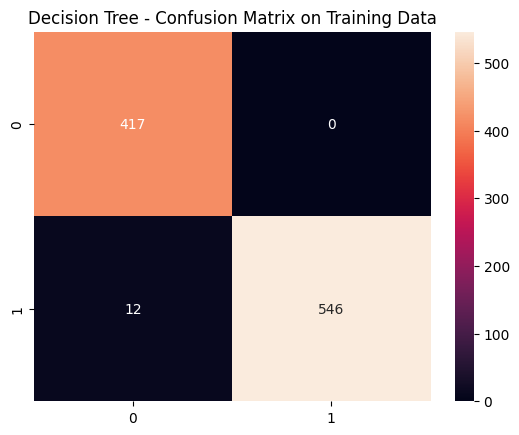

In [75]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', random_state=27).fit(x_train,y_train)
train_pred_tree = tree.predict(x_train)
print('Training Accuracy score - ',accuracy_score(y_train, train_pred_tree),'\n\n')
print(classification_report(y_train, train_pred_tree))
sns.heatmap(confusion_matrix(y_train, train_pred_tree), annot=True, fmt='.0f')
plt.title('Decision Tree - Confusion Matrix on Training Data');

Test Accuracy score -  0.6004784688995215 


              precision    recall  f1-score   support

          No       0.57      0.62      0.59       197
         Yes       0.63      0.58      0.61       221

    accuracy                           0.60       418
   macro avg       0.60      0.60      0.60       418
weighted avg       0.60      0.60      0.60       418



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

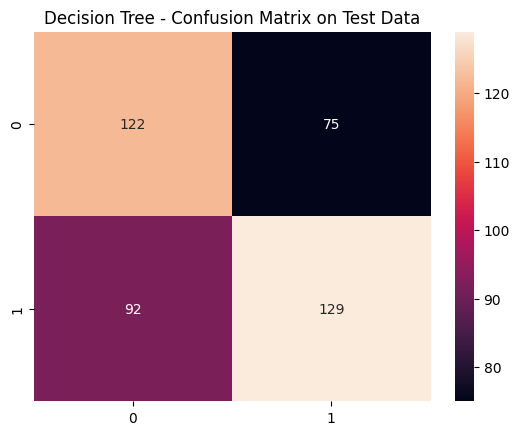

In [76]:
test_pred_tree = tree.predict(x_test)
print('Test Accuracy score - ',accuracy_score(y_test, test_pred_tree),'\n\n')
print(classification_report(y_test, test_pred_tree))
sns.heatmap(confusion_matrix(y_test, test_pred_tree), annot=True, fmt='.0f')
plt.title('Decision Tree - Confusion Matrix on Test Data');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

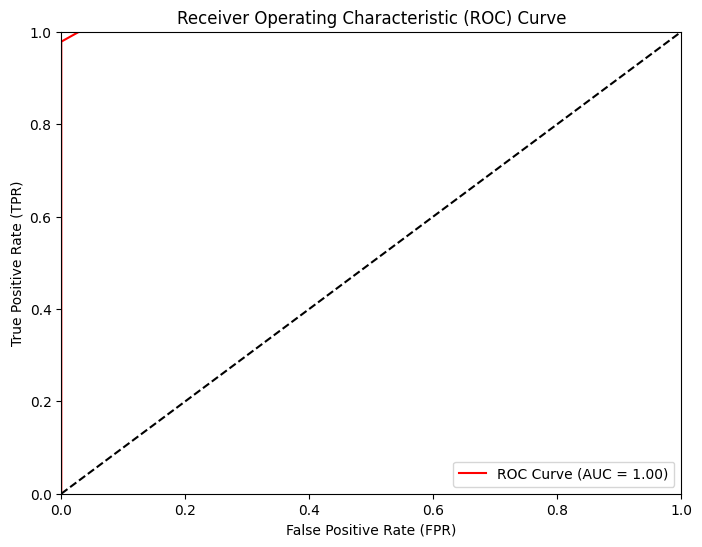

In [77]:
train_pred_prob_tree = tree.predict_proba(x_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, train_pred_prob_tree, pos_label='Yes')

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score, color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

* Compared to all 3 models above, Decision Tree model has good accuracy on Training Data but overfitted on Test data.
* We can overcome this issue but restricting the tree not to grow over a limit by setting values in model. Let's build generalised Decision Tree model.

In [78]:
param_grid = {
    'max_depth':np.arange(3,15),
    'min_samples_leaf': [2,5,10,20],
    'min_samples_split': [2,5,10,20],
    'criterion':['gini','entropy']
} # max_features=3

from sklearn.model_selection import GridSearchCV,KFold
kf = KFold(n_splits=5,shuffle=True,random_state=27)

tree2 = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree2, param_grid=param_grid, cv=kf)

grid_search.fit(x_train,y_train)

<IPython.core.display.Javascript object>

GridSearchCV(cv=KFold(n_splits=5, random_state=27, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]})

In [79]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [80]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5)

Training Accuracy score -  0.7497435897435898 


              precision    recall  f1-score   support

          No       0.80      0.56      0.66       417
         Yes       0.73      0.89      0.80       558

    accuracy                           0.75       975
   macro avg       0.76      0.73      0.73       975
weighted avg       0.76      0.75      0.74       975



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

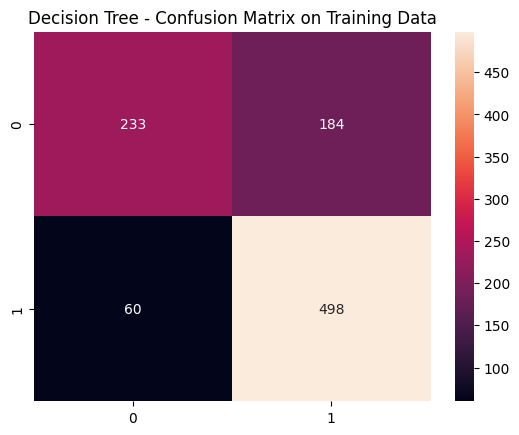

In [81]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5, random_state=27).fit(x_train,y_train)
train_pred_tree3 = tree3.predict(x_train)
print('Training Accuracy score - ',accuracy_score(y_train, train_pred_tree3),'\n\n')
print(classification_report(y_train, train_pred_tree3))
sns.heatmap(confusion_matrix(y_train, train_pred_tree3), annot=True, fmt='.0f')
plt.title('Decision Tree - Confusion Matrix on Training Data');

Training Accuracy score -  0.7630769230769231 


              precision    recall  f1-score   support

          No       0.78      0.62      0.69       417
         Yes       0.75      0.87      0.81       558

    accuracy                           0.76       975
   macro avg       0.77      0.75      0.75       975
weighted avg       0.77      0.76      0.76       975



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

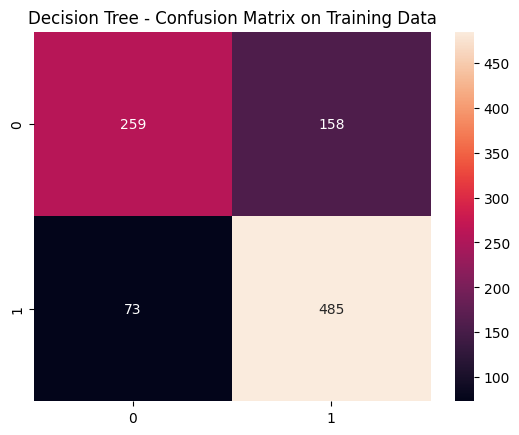

In [ ]:
# tree2 = DecisionTreeClassifier(criterion='gini', random_state=27, max_depth=7, min_samples_leaf=10, min_samples_split=30).fit(x_train,y_train)
# train_pred_tree2 = tree2.predict(x_train)
# print('Training Accuracy score - ',accuracy_score(y_train, train_pred_tree2),'\n\n')
# print(classification_report(y_train, train_pred_tree2))
# sns.heatmap(confusion_matrix(y_train, train_pred_tree2), annot=True, fmt='.0f')
# plt.title('Decision Tree - Confusion Matrix on Training Data');

Test Accuracy score -  0.6555023923444976 


              precision    recall  f1-score   support

          No       0.68      0.52      0.59       197
         Yes       0.64      0.78      0.70       221

    accuracy                           0.66       418
   macro avg       0.66      0.65      0.65       418
weighted avg       0.66      0.66      0.65       418



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

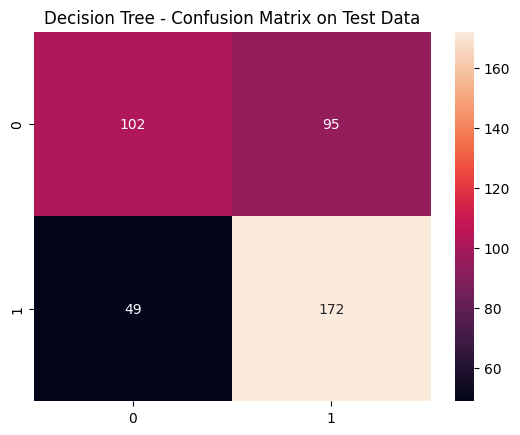

In [147]:
test_pred_tree2 = tree2.predict(x_test)
print('Test Accuracy score - ',accuracy_score(y_test, test_pred_tree2),'\n\n')
print(classification_report(y_test, test_pred_tree2))
sns.heatmap(confusion_matrix(y_test, test_pred_tree2), annot=True, fmt='.0f')
plt.title('Decision Tree - Confusion Matrix on Test Data');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

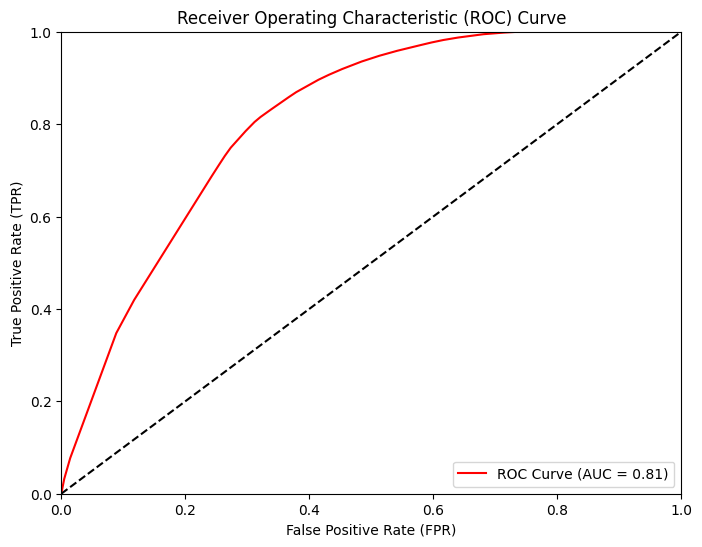

In [148]:
train_pred_prob_tree2 = tree2.predict_proba(x_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, train_pred_prob_tree2, pos_label='Yes')

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score, color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()